# Linear Modelling - Maxiumum Likelihood

One approach to learning parameters is minimizing the loss function, another method is to incorporate a random variable to denote _noise_, which has considerable advantages over are former approach.

## The Gaussian (normal) distribution

A Gaussian distribution is defined over the sample space of all real numbers with the pdf for a random varaible $Y$ as the following:

$$
p(y \mid \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left\{ - \frac{1}{2 \sigma^2} (y - \mu)^2 \right\}}
$$

The common shorthand notation is the following:

$$
p(y \mid \mu, \sigma^2) = \mathcal{N}(\mu, \sigma^2)
$$

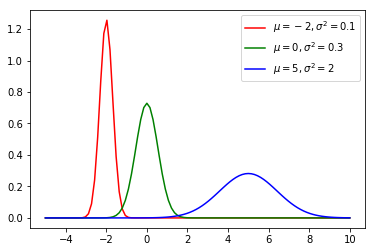

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.linspace(-5, 10, 100)

plt.plot(x_axis, norm.pdf(x_axis,-2,0.1 ** 0.5), 'r', label="$\mu = -2, \sigma^2 = 0.1$")
plt.plot(x_axis, norm.pdf(x_axis,0,0.3 ** 0.5), 'g', label="$\mu = 0, \sigma^2 = 0.3$")
plt.plot(x_axis, norm.pdf(x_axis,5,2 ** 0.5), 'b', label="$\mu = 5, \sigma^2 = 2$")
plt.legend()
plt.show()

## Multivariate Gaussian

We can generalize the gaussain distribution to define a density function over vectors. For a vector $\mathbf{x} = [x_1, ... x_D]^T$ the density function is defined as:

$$
p(\mathbf{x}) = \frac{1}{(2 \pi)^{\frac{D}{2}}{\begin{vmatrix}\mathbf{\Sigma}\end{vmatrix}^{\frac{1}{2}}}} \exp \left\{ - \frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right\}
$$

where $\mathbf{\mu}$ is a vector of mean values, and the variance a $D \times D$  covariance matrix (a matrix whose element in the $i$, $j$ position is the covariance between the $i$ th and $j$ th elements).

mu = [2 1], Epsilon = [[1 0]
 [0 1]]


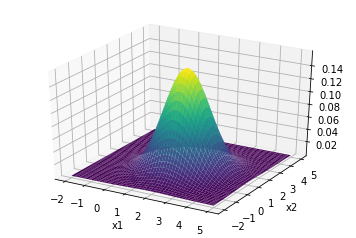

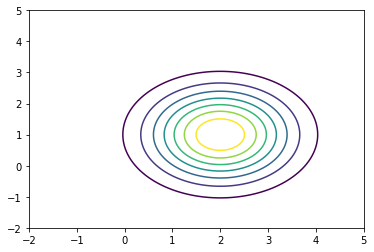

mu = [2 1], Epsilon = [[ 1.   0.8]
 [ 0.8  1. ]]


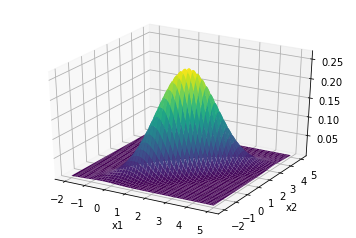

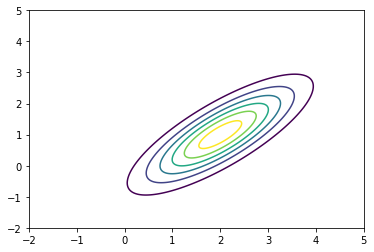

In [30]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

def plot_m_gauss(mu, variance):
    #Create grid and multivariate normal
    x = np.linspace(-2,5,500)
    y = np.linspace(5,-2,500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal(mu, variance)

    #Make a 3D plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    plt.show()

    plt.contour(X, Y, rv.pdf(pos))
    plt.show()
    

mu_1 = np.array([2, 1]).T
variance_1 = np.array([[1, 0], [0, 1]])
print("mu = {}, Epsilon = {}".format(mu_1, variance_1))
plot_m_gauss(mu_1, variance_1)

mu_2 = np.array([2, 1]).T
variance_2 = np.array([[1, 0.8], [0.8, 1]])
print("mu = {}, Epsilon = {}".format(mu_2, variance_2))
plot_m_gauss(mu_2, variance_2)

A special case of the multivariate Gaussian is where the two variables are independent, hence:

$$
\mathbf{\Sigma} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \mathbf{I}
$$

$$
\begin{align}
p(\mathbf{x}) &= \frac{1}{(2 \pi)^{\frac{D}{2}} \begin{vmatrix}\mathbf{I}\end{vmatrix}^{\frac{1}{2}} } \exp \left\{ - \frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{I}^{-1} (\mathbf{x} - \mathbf{\mu}) \right\} \\
&= \frac{1}{(2 \pi)^{\frac{D}{2}} \begin{vmatrix}\mathbf{I}\end{vmatrix}^{\frac{1}{2}} } \exp \left\{ - \frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T (\mathbf{x} - \mathbf{\mu}) \right\} \\
&= \frac{1}{(2 \pi)^{\frac{D}{2}} \begin{vmatrix}\mathbf{I}\end{vmatrix}^{\frac{1}{2}} } \exp \left\{ - \frac{1}{2} \sum_{d=1}^D (x_d - \mu_d)^2 \right\}
\end{align}
$$

The exponential of a sum is a product of exponentials thus

$$
p(\mathbf{x}) = \frac{1}{(2 \pi)^{\frac{D}{2}} \begin{vmatrix}\mathbf{I}\end{vmatrix}^{\frac{1}{2}} } \prod_{d=1}^D \exp \left\{ - \frac{1}{2} (x_d - \mu_d)^2 \right\}
$$

The determinant of $\mathbf{I}$ is 1, and $(2 \pi)^{\frac{D}{2}}$ can be written as $\prod_{d=1}^D (2 \pi)^{\frac{1}{2}}$ thus we arrive at:

$$
p(\mathbf{x}) = \prod_{d=1}^D \frac{1}{\sqrt{2 \pi} } \exp \left\{ - \frac{1}{2} (x_d - \mu_d)^2 \right\}
$$

Each term in the product in a univariate Gaussian (with mean $\mu_d$ and variance $1$), thus by definition of independence ($p(A \cup B) = p(A)p(B)$ iff $A$ and $B$ are independent), the elements of $\mathbf{x}$ is independent. This will work for any $\mathbf{\Sigma}$ with non-zero elements only in the diagonal positions.

## Thinking generatively

If we think how we could generate mens 100m times that looks like the data we observe we would arive at the following:

$$
t_n = \mathbf{w}^T \mathbf{x}_n + \epsilon_n
$$

where $\epsilon_n$ is a random variable.

Now we need to determine the distribution for $\epsilon_n$. Our model is continous thus $\epsilon_n$ is must be a continous random varible. Their is a random variable for each Olympic year, and its a resonable assumption that these values are independent.

$$
p(\epsilon_1, ..., \epsilon_n) = \prod_{n=1}^N p(\epsilon_n)
$$

Lets assume $p(\epsilon_n)$ follows a Gaussian distribution with a zero mean and variance $\sigma$. Our model can now be described as two components:

1. A _deterministic_ component ($\mathbf{w}^T \mathbf{x}_n$) referred to as a _trend_ or _drift_
2. A random component ($\epsilon_n$) referred to as _noise_

In our case the noise is _additive_ but some applications might call for _mulitiplicative_ noise such as pixel degradation.

## Likelihood

Our model is of the following form:

$$
t_n = f(x_n; \mathbf{w}) + \epsilon_n \quad \epsilon_n \sim \mathcal{N}(0, \sigma^2)
$$

We cant minimize the loss since $t_n$ is no longer a fixed value, its a random variable. Adding a constant ($\mathbf{w}^T \mathbf{x}_n$) to a Gausian distributed random variable is equivalent to a new Gausian random variable with the constant added to the mean. Thus $t_n$ has the following pdf:

$$
p(t_n \mid \mathbf{x}_n, \mathbf{w}, \sigma^2) = \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2)
$$

We can use this to find optimal values for $\mathbf{w}$ and $\sigma^2$, consider the year 1980, using the values for $\mathbf{w}$ we found previously and assuming $\sigma^2 = 0.05$ we can plot:

$$
p\left(t_n \mid \mathbf{x}_n = \begin{bmatrix}1\\1980\end{bmatrix}, \mathbf{w} = \begin{bmatrix}36.416\\-0.0133\end{bmatrix}, \sigma^2 = 0.05 \right)
$$

mu = 10.021302194800871, sigma^2 = 0.05


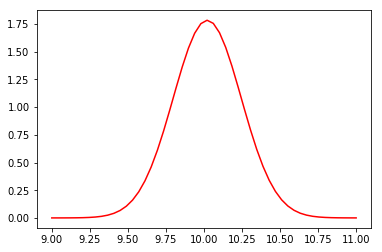

In [4]:
mu = 36.41645590250286 - 0.013330885710960602 * 1980
sigma2 = 0.05 

print("mu = {}, sigma^2 = {}".format(mu, sigma2))

x_axis = np.linspace(9, 11, 50)

plt.plot(x_axis, norm.pdf(x_axis, mu, sigma2 ** 0.5), 'r')
plt.show()

According to the graph the most _likely_ winning time for 1980 is $10.02$ seconds. The actuall time was $10.25$, thus we need to tune the parameters $\mathbf{w}$ and $\sigma^2$ to make the density as high as possible at $t = 10.25$.

## Dataset likelihood

We can extend this to the whole dataset by finding the joint conditional density:

$$
p(t_1, ..., t_N \mid \mathbf{x}_1, ..., \mathbf{x}_N, \mathbf{w}, \sigma^2)
$$

By using the vector notation defined previously and the assumption that the noise at each datapoint is independent, we get the following:

$$
L = p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \sigma^2) = \prod_{n=1}^N p(t_n \mid \mathbf{x_n}, \mathbf{w}, \sigma^2) = \prod_{n=1}^N \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2)
$$

## Maximum likelihood

To find $\widehat{\mathbf{w}}$ and $\widehat{\sigma^2}$ clearly we need to maximize the value of $L$, to do this we will maximize the log-likelyhood (for analytical reasons)

$$
\begin{align}
L &= \prod_{n=1}^N \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) \\
\log L &= \log \left(\prod_{n=1}^N \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) \right) \\
&= \sum_{n=1}^N \log \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) \\
&= \sum_{n=1}^N \log \left( \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left\{ - \frac{1}{2 \sigma^2} (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \right\}} \right) \\
&= \sum_{n=1}^N \left( -\frac{1}{2} \log(2 \pi) - \log \sigma - \frac{1}{2 \sigma^2} (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \right) \\
&= -\frac{N}{2} \log(2 \pi) - N \log \sigma - \frac{1}{2 \sigma^2} \sum_{n=1}^N (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \\
\end{align}
$$

As previosly we differentiate and set to zero to find the turning point, in this case we want a maximum.

$$
\begin{align}
\frac{\partial \log L}{\partial \mathbf{w}} &= \frac{1}{\sigma^2} \sum^N_{n=1} \mathbf{x}_n(t_n - \mathbf{x}_n^T \mathbf{w}) \\
&= \frac{1}{\sigma^2} \sum^N_{n=1} \mathbf{x}_n t_n - \mathbf{x}_n \mathbf{x}_n^T \mathbf{w} \\
\end{align}
$$

Using the vector/matix notation from earlier, $\sum_{n=1}^N \mathbf{x}_n t_n$ becomes $\mathbf{X}^T \mathbf{t}$ and $\sum_{n=1}^N \mathbf{x}_n \mathbf{x}_n^T \mathbf{w}$ becomes $\mathbf{X}^T \mathbf{Xw}$, thus the derivitive becomes:

$$
\frac{\partial \log L}{\partial \mathbf{w}} = \frac{1}{\sigma^2} (\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw})
$$

Setting the derivitive to $\mathbf{0}$ (a vector with all zeros) and solving for $\mathbf{w}$ gives us:

$$
\begin{align}
\frac{1}{\sigma^2} (\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw}) &= \mathbf{0} \\
\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw} &= \mathbf{0} \\
- \mathbf{X}^t \mathbf{Xw} &= - \mathbf{X}^T \mathbf{t} \\
\mathbf{X}^t \mathbf{Xw} &= \mathbf{X}^T \mathbf{t} \\
\widehat{\mathbf{w}} &= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} \\
\end{align}
$$

This is the same result as minimizing the squared loss. Minimising the squared loss is equivalent to the maximum likelihood solution if the noise is assumed to be Gaussian.

Now we repeat the process for $\sigma^2$

$$
\begin{align}
\frac{\partial \log L}{\partial \sigma} &= - \frac{N}{\sigma} + \frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2
\end{align}
$$

$$
\begin{align}
- \frac{N}{\sigma} + \frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 &= 0 \\ 
\frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 &= \frac{N}{\sigma} \\
\sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 &= N \sigma^2 \\
\widehat{\sigma^2} &= \frac{1}{N} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2 \\
\end{align}
$$

This makes sence, the variance is the average square error. We can use the fact that $\sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2$ is equivalent to $(\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}})^T (\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}})$

$$
\begin{align}
\widehat{\sigma^2} &= \frac{1}{N} (\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}})^T (\mathbf{t} - \mathbf{X}\widehat{\mathbf{w}}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - 2 \mathbf{t}^T \mathbf{X} \widehat{\mathbf{w}} + \widehat{\mathbf{w}}^T \mathbf{X}^T \mathbf{X} \widehat{\mathbf{w}}) \\
\end{align}
$$

Now using $\widehat{\mathbf{w}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}$ and $\widehat{\mathbf{w}}^T = \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1}$

$$
\begin{align}
\widehat{\sigma^2} &= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - 2 \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} + \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - 2 \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t} + \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - \mathbf{t}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}) \\
&= \frac{1}{N} (\mathbf{t}^T \mathbf{t} - \mathbf{t}^T \mathbf{X} \widehat{\mathbf{w}}) \\
\end{align}
$$

In [5]:
x_values = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 
     1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
t_values = [12.00, 11.00, 11.00, 11.20, 10.80, 10.80, 10.80, 10.60, 10.80, 10.30, 10.30, 10.30, 10.40, 10.50, 
     10.20, 10.00, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69]

N = len(x_values)
X = np.matrix([[1,x] for x in x_values])

def get_params(X_mat):
    XT = np.transpose(X_mat)
    tT = np.matrix([t_values])
    t = np.transpose(tT)

    best_w = ((XT * X_mat) ** -1) * XT * t
    best_sigma2 = (1/N) * (tT * t - tT * X_mat * best_w)

    return (best_w, best_sigma2)
    
print("w = {}\n\nsigma^2 = {}".format(*get_params(X)))

w = [[  3.64164559e+01]
 [ -1.33308857e-02]]

sigma^2 = [[ 0.05030711]]


## Checking the turning point

Previously we had differentatiated the loss function twice to check the turning point was a minimum, we would like to do the same here to check if the likelihood is maximum.

Since the dirivative is with respect to a vector, we need to form a Hessian matrix, a square matrix with all the second order patrial derivatives of a function, for example for a function $f(\mathbf{x}; \mathbf{w})$ where $\mathbf{w} = [w_1, ..., w_K]^T$

$$
\mathbf{H} = \begin{bmatrix}
\dfrac{\partial^2 f}{\partial w_1^2} & \dfrac{\partial^2 f}{\partial w_1 \partial w_2} & \cdots & \dfrac{\partial^2 f}{\partial w_1 \partial w_K} \\
\dfrac{\partial^2 f}{\partial w_2 \partial w_1} & \dfrac{\partial^2 f}{\partial w_2^2} & \cdots & \dfrac{\partial^2 f}{\partial w_2 \partial w_K} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2 f}{\partial w_K \partial w_1} & \dfrac{\partial^2 f}{\partial w_K \partial w_2} & \cdots & \dfrac{\partial^2 f}{\partial w_K^2} \\
\end{bmatrix}
$$

The turning point is maximum if the matix is negative definite. A real-valued matrix is negative definite if $\mathbf{x}^T \mathbf{H} \mathbf{x} < 0$ for all real values of $\mathbf{x}$

The first order derivative was

$$
\frac{\partial \log L}{\partial \mathbf{w}} = \frac{1}{\sigma^2} (\mathbf{X}^T \mathbf{t} - \mathbf{X}^t \mathbf{Xw})
$$

Integrating with repect to $\mathbf{w}^T$ gives us the Hessian matrix:

$$
\frac{\partial \log L}{\partial \mathbf{w} \partial \mathbf{w}^T} = - \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X}
$$

Now to check the matrix is negative definite we must show

$$
- \frac{1}{\sigma^2} \mathbf{z}^T \mathbf{X}^T \mathbf{X} \mathbf{z} < 0
$$

for any vector $\mathbf{z}$ or equivalently (since $\sigma^2$ must be positive)

$$
\mathbf{z}^T \mathbf{X}^T \mathbf{X} \mathbf{z} > 0
$$

So that we can explicitly multiply out the various terms, we will rescrict $\mathbf{X}$ to

$$
\mathbf{X} 
= 
\begin{bmatrix}
\mathbf{x}^T_1 \\
\mathbf{x}^T_2 \\
\vdots \\
\mathbf{x}^T_N
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
\vdots & \vdots \\
x_{N1} & x_{N2}
\end{bmatrix}
$$

Thus $\mathbf{X}^T \mathbf{X}$ becomes

$$
\mathbf{X}^T \mathbf{X} 
= 
\begin{bmatrix}
\sum_{i=1}^N{x^2_{i1}} & \sum_{i=1}^N{x_{i1} x_{i2}} \\
\sum_{i=1}^N{x_{i2} x_{i1}} & \sum_{i=1}^N{x^2_{i2}}
\end{bmatrix}
$$

Pre and post multiplying with the arbitary vector $\mathbf{z} = \begin{bmatrix} z_1 \\ z_2 \end{bmatrix}$ gives us:

$$
\begin{align}
\mathbf{z}^T \mathbf{X}^T \mathbf{X} \mathbf{z} &= \mathbf{z}^T 
\begin{bmatrix}
\sum_{i=1}^N{x^2_{i1}} & \sum_{i=1}^N{x_{i1} x_{i2}} \\
\sum_{i=1}^N{x_{i2} x_{i1}} & \sum_{i=1}^N{x^2_{i2}}
\end{bmatrix}
\mathbf{z} \\
&=
\begin{bmatrix}
z_1 \sum_{i=1}^N{x^2_{i1}} + z_2 \sum_{i=1}^N{x_{i2} x_{i1}} &
z_1 \sum_{i=1}^N{x_{i1} x_{i2}} + z_2 \sum_{i=1}^N{x^2_{i2}}
\end{bmatrix}
\mathbf{z} \\
&= z_1^2 \sum_{i=1}^N{x^2_{i1}} + 2 z_1 z_2 \sum_{i=1}^N{x_{i1} x_{i2}} + z^2_2 \sum_{i=1}^N{x^2_{i2}}
\end{align}
$$

The terms $z_1^2 \sum_{i=1}^N{x^2_{i1}}$ and $z^2_2 \sum_{i=1}^N{x^2_{i2}}$ are always positive thus proving $\mathbf{z}^T \mathbf{X}^T \mathbf{X} \mathbf{z}$ is positive is equivalent to

$$
z_1^2 \sum_{i=1}^N{x^2_{i1}} + z^2_2 \sum_{i=1}^N{x^2_{i2}} > 2 z_1 z_2 \sum_{i=1}^N{x_{i1} x_{i2}}
$$

The sum of the positive terms must be greater that the other term so that the whole term is greater than zero. Now let $y_{i1} = z_1 x_{i1}$ and $y_{i2} = z_2 x_{i2}$.

$$
\begin{align}
z_1^2 \sum_{i=1}^N{x^2_{i1}} + z^2_2 \sum_{i=1}^N{x^2_{i2}} &> 2 z_1 z_2 \sum_{i=1}^N{x_{i1} x_{i2}}\\
\sum_{i=1}^N{y^2_{i1}} + \sum_{i=1}^N{y^2_{i2}} &> 2 \sum_{i=1}^N{y_{i1} y_{i2}}\\
\sum_{i=1}^N{\left(y^2_{i1} + y^2_{i2} \right)} &> 2 \sum_{i=1}^N{y_{i1} y_{i2}}
\end{align}
$$

Now consider an arbitary $i$

$$
\begin{align}
y^2_{i1} + y^2_{i2} &> 2 y_{i1} y_{i2} \\
y^2_{i1} - 2 y_{i1} y_{i2} + y^2_{i2} &> 0 \\
(y_{i1} - y_{i2})^2 &> 0
\end{align}
$$

Thus the only case where this is not true is when $y_{i1}^2 = y_{i2}^2$ and thus $x_{i1} = x_{i2}$, somthing that is unlikely to happen in practive. Thus for an  arbitary $i$, $y^2_{i1} + y^2_{i2} > 2 y_{i1} y_{i2}$ holds, and thus the summation of the terms holds. Hence, $\mathbf{z}^T \mathbf{X}^T \mathbf{X} \mathbf{z}$ is always positive, thus $\mathbf{H}$, our Hessian matrix is negative definite, thus the solution is a maximum.

Likewise, to check $\widehat{\sigma^2}$ corrsponds to the maximum, we diffentiate

$$
\frac{\partial \log L}{\partial \sigma} = - \frac{N}{\sigma} + \frac{1}{\sigma^3} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2
$$

Again with respect to $\sigma$, giving us

$$
\frac{\partial \log L}{\partial \sigma^2} = - \frac{N}{\sigma^2} + \frac{3}{\sigma^4} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2
$$

Substituting $\widehat{\sigma^2} = \frac{1}{N} \sum_{n=1}^N (t_n - \mathbf{x}^T \widehat{\mathbf{w}})^2$

$$
\begin{align}
\frac{\partial \log L}{\partial \sigma^2} &= - \frac{N}{\widehat{\sigma^2}} + \frac{3}{\left(\widehat{\sigma^2}\right)^2} N \widehat{\sigma^2} \\
&= - \frac{2N}{\widehat{\sigma^2}}
\end{align}
$$

Thus $\widehat{\sigma^2}$ corresponds to a maximum.

## Maximum likelihood favours complexity

By substituting $\widehat{\sigma^2}$ into $\log L$ gives the value of the log-likelihood at the maximum

$$
\begin{align}
\log L &= -\frac{N}{2} \log(2 \pi) - N \log \sigma - \frac{1}{2 \sigma^2} \sum_{n=1}^N (t_n - \mathbf{w}^T \mathbf{x}_n)^2 \\
&= -\frac{N}{2} \log(2 \pi) - N \log \sqrt{\widehat{\sigma^2}} - \frac{1}{2 \widehat{\sigma^2}} N\widehat{\sigma^2} \\
&= -\frac{N}{2} \log(2 \pi) - \frac{N}{2} \log \widehat{\sigma^2} - \frac{N}{2}\\
&= -\frac{N}{2} (1 + \log 2 \pi) - \frac{N}{2} \log \widehat{\sigma^2}\\
\end{align}
$$

Thus by decreasing $\widehat{\sigma^2}$ we increase the log-likeliness. One way to decrease $\widehat{\sigma^2}$ is to modify $f(\mathbf{x};\mathbf{w})$ so that it can capture more of the noise. The same tradeoff between overfitting and generalization as we saw last time occors. Before we used regularization to peanalize complex models, _prior distributions_ on parameter values can acieve the same thing with probablistic models.

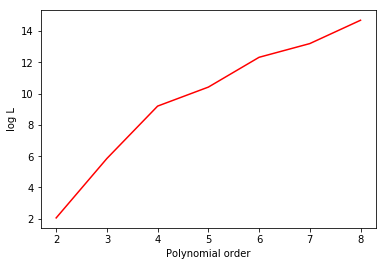

In [37]:
# Normalize x, for numerical stability
stable_x = np.array([float(x) for x in x_values]) - x_values[0]
stable_x *= 0.4

orders = list(range(2, 9))
log_Ls = []
for order in orders:
    X = np.matrix([[x**o for o in range(0, order)] for x in stable_x])
    (_, ss) = get_params(X)
    log_L = -(N/2)*(1+np.log(2 * np.pi)) - (N/2) * np.log(ss)
    log_Ls.append(log_L.item(0))
    
plt.plot(orders, log_Ls, 'r')
plt.xlabel('Polynomial order')
plt.ylabel('log L')
plt.show()

## Effect of noise on estimates

It would be useful to determine how much confidence we have in our parameters. Firstly is our estimator $\widehat{w}$ _unbiased_.

Our current model takes the form:

$$
t_n = \mathbf{w}^T \mathbf{x}_n + \epsilon_n
$$

Since we defined $\epsilon_n$ to be normally distributed, the _generating_ distribution (or likelihood) is a product of normal densities:

$$
p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \sigma^2) = \prod^N_{n=1} p(t_n \mid \mathbf{x}_n \mathbf{w}) = \prod^N_{n=1} \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2)
$$

We have shown that a product of univariant Gaussians can be rewritten as a multivariant Gaussian with a diangonal covariance, thus

$$
p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \sigma^2) = \prod^N_{n=1} \mathcal{N}(\mathbf{w}^T \mathbf{x}_n, \sigma^2) = \mathcal{N}(\mathbf{Xw}, \sigma^2 \mathbf{I})
$$